In [1]:
import pandas as pd 

In [2]:
names1880=pd.read_csv(r'/Users/lijianwei/Desktop/pydata-book-2nd-edition/datasets/babynames/yob1880.txt',names=['name','sex','births'])

In [3]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [4]:
names1880.groupby('sex').sum()

,births
sex,
F,90993
M,110493


In [5]:
years=range(1880,2011)

In [7]:
pieces=[]
columns=['name','sex','births']
for year in years:
    path='/Users/lijianwei/Desktop/pydata-book-2nd-edition/datasets/babynames/yob%d.txt'%year
    frame=pd.read_csv(path,names=columns)
    frame['year']=year
    pieces.append(frame)

In [8]:
names=pd.concat(pieces,ignore_index=True)

In [9]:
total_births=names.pivot_table('births',index='year',columns='sex',aggfunc='sum')

<IPython.core.display.Javascript object>


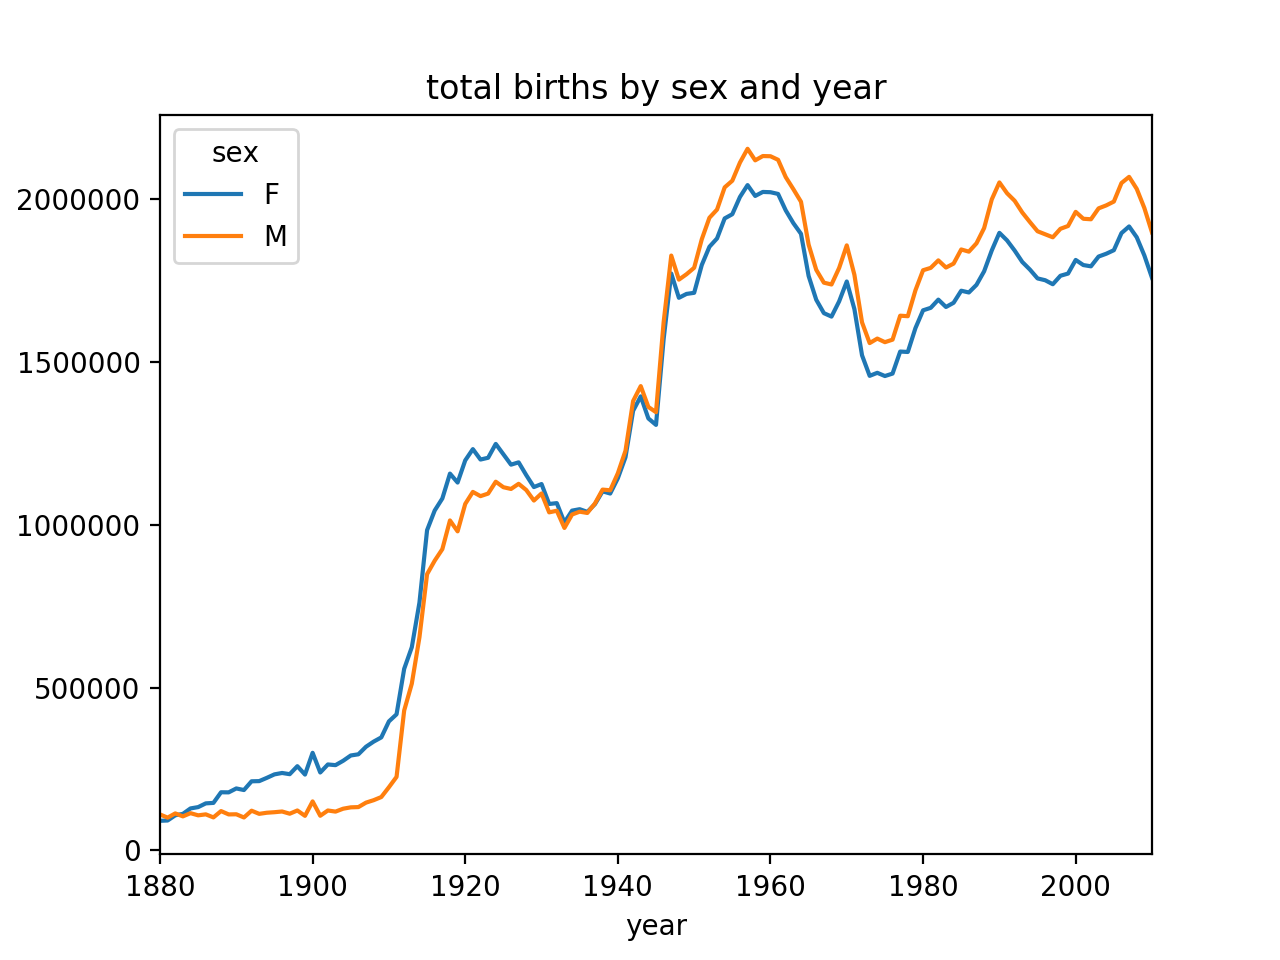

In [10]:
%matplotlib notebook
total_births.plot(title='total births by sex and year')

In [11]:
#新增prop列，获取婴儿名称占有比例
def add_prop(group):
    group['prop']=group['births'] /group['births'].sum()
    return group

In [12]:
names=names.groupby(['year','sex']).apply(add_prop)

In [15]:
names.groupby(['year','sex']).sum().head()

births  prop
year sex              
1880 F     90993   1.0
     M    110493   1.0
1881 F     91955   1.0
     M    100748   1.0
1882 F    107851   1.0

In [16]:
#获取每个性别/年份组合的前1000名
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]

In [17]:
grouped=names.groupby(['year','sex'])
top1000=grouped.apply(get_top1000)

In [31]:
top1000.reset_index(inplace=True,drop=True)

In [68]:
top1000.groupby(['year','sex'])['prop'].sum()

year  sex
1880  F      1.000000
      M      0.997375
1881  F      1.000000
      M      1.000000
1882  F      0.998702
      M      0.995646
1883  F      0.997596
      M      0.998566
1884  F      0.993156
      M      0.994539
1885  F      0.992251
      M      0.995501
1886  F      0.989504
      M      0.995035
1887  F      0.988279
      M      0.996697
1888  F      0.984241
      M      0.992429
1889  F      0.984061
      M      0.994981
1890  F      0.982566
      M      0.992749
1891  F      0.982177
      M      0.993725
1892  F      0.979746
      M      0.988815
1893  F      0.980001
      M      0.991720
1894  F      0.978571
      M      0.989048
               ...   
1996  F      0.817149
      M      0.905296
1997  F      0.811416
      M      0.901020
1998  F      0.805665
      M      0.896381
1999  F      0.799804
      M      0.892714
2000  F      0.791455
      M      0.887008
2001  F      0.784125
      M      0.882799
2002  F      0.780403
      M      0.879775


In [33]:
#将top1000的数据分成男孩和女孩
boys=top1000[top1000.sex=='M']
girls=top1000[top1000.sex=='F']

In [38]:
total_births=top1000.pivot_table('births',columns='name',index='year',aggfunc='sum')

<IPython.core.display.Javascript object>


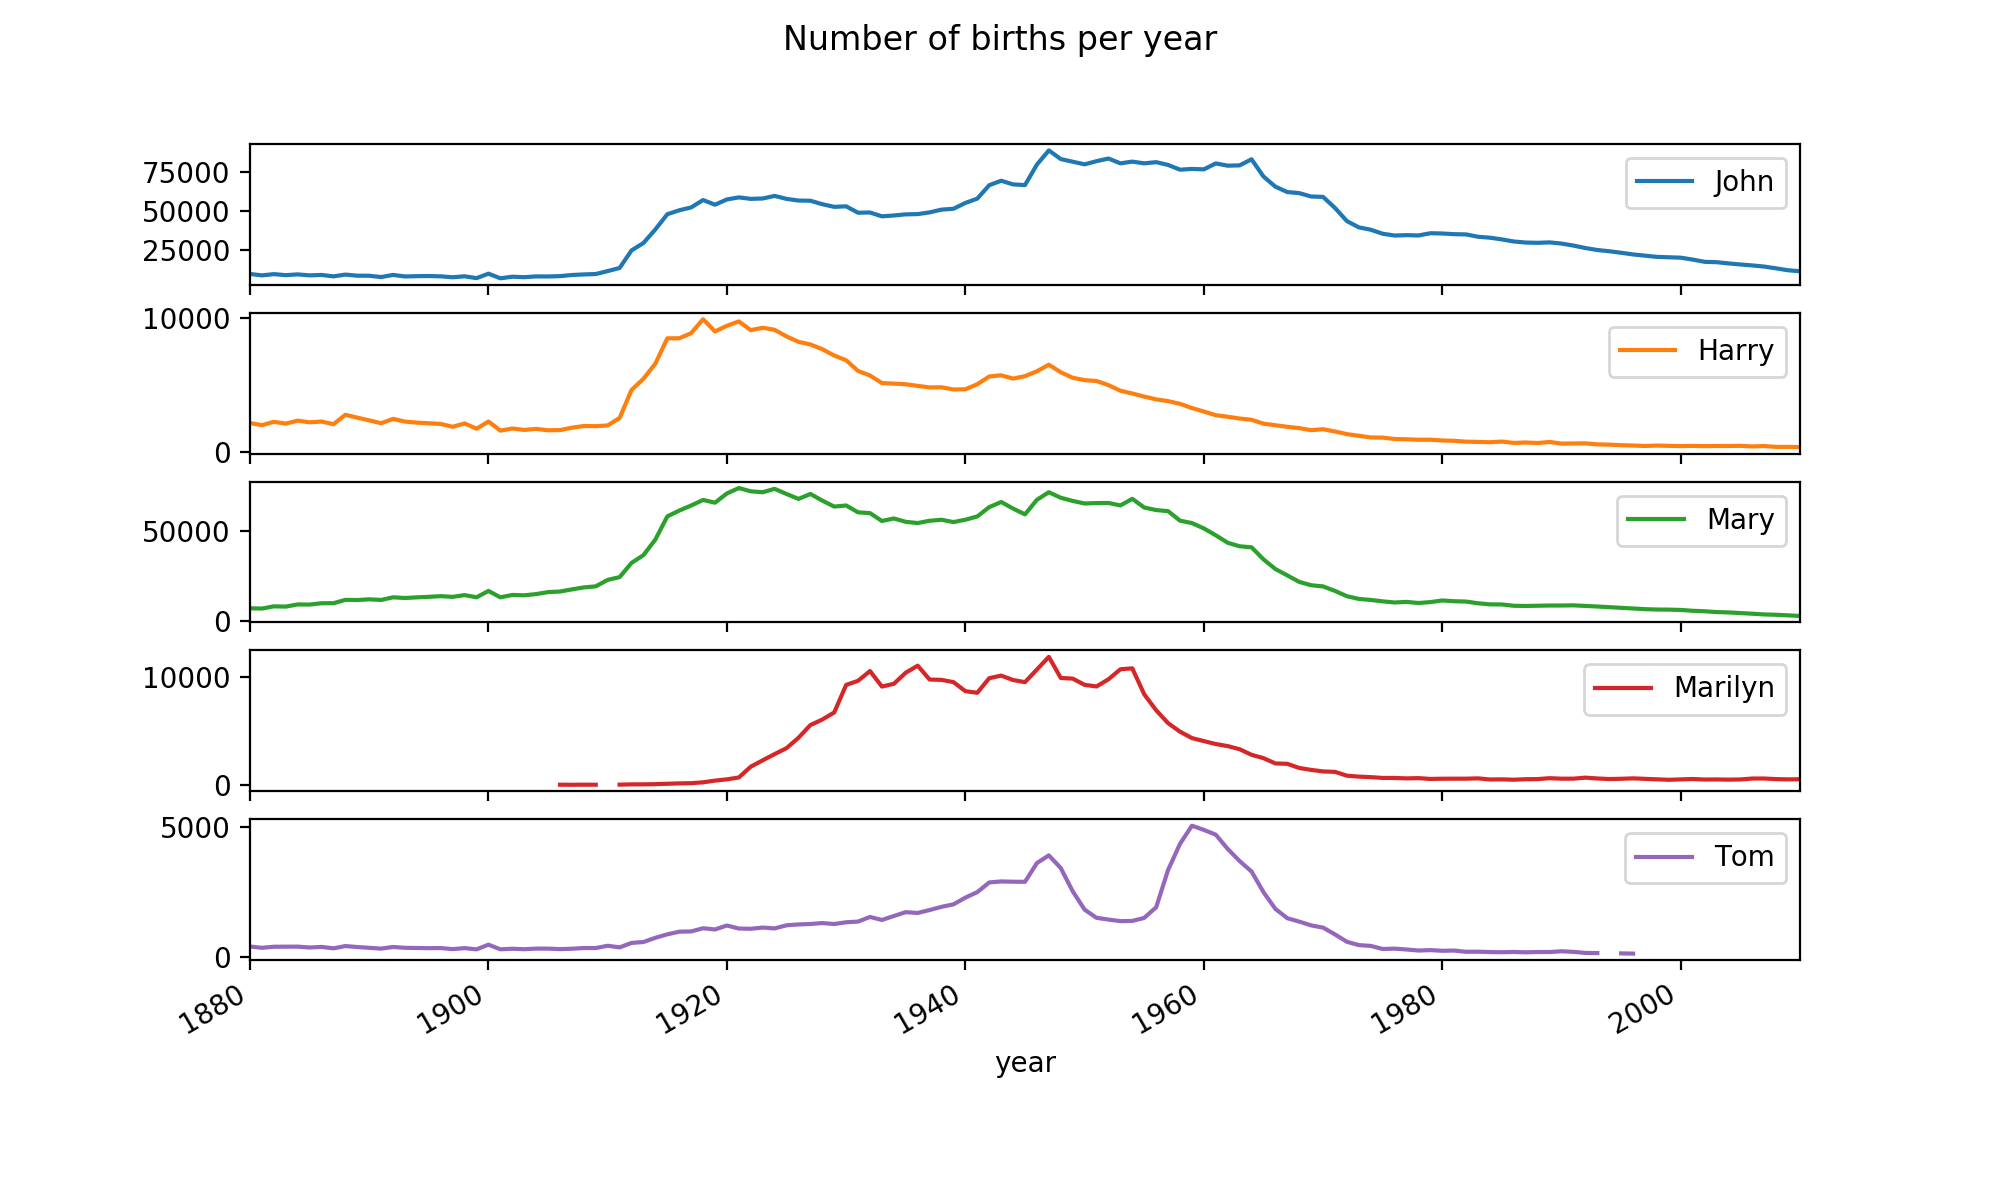

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11e9c6cc0>,
      dtype=object)

In [67]:
#一些男孩女孩的名字随时间变化的趋势
subset=total_births[['John','Harry','Mary','Marilyn','Tom']]
subset.plot(subplots=True,figsize=(10,6),title='Number of births per year')

<IPython.core.display.Javascript object>


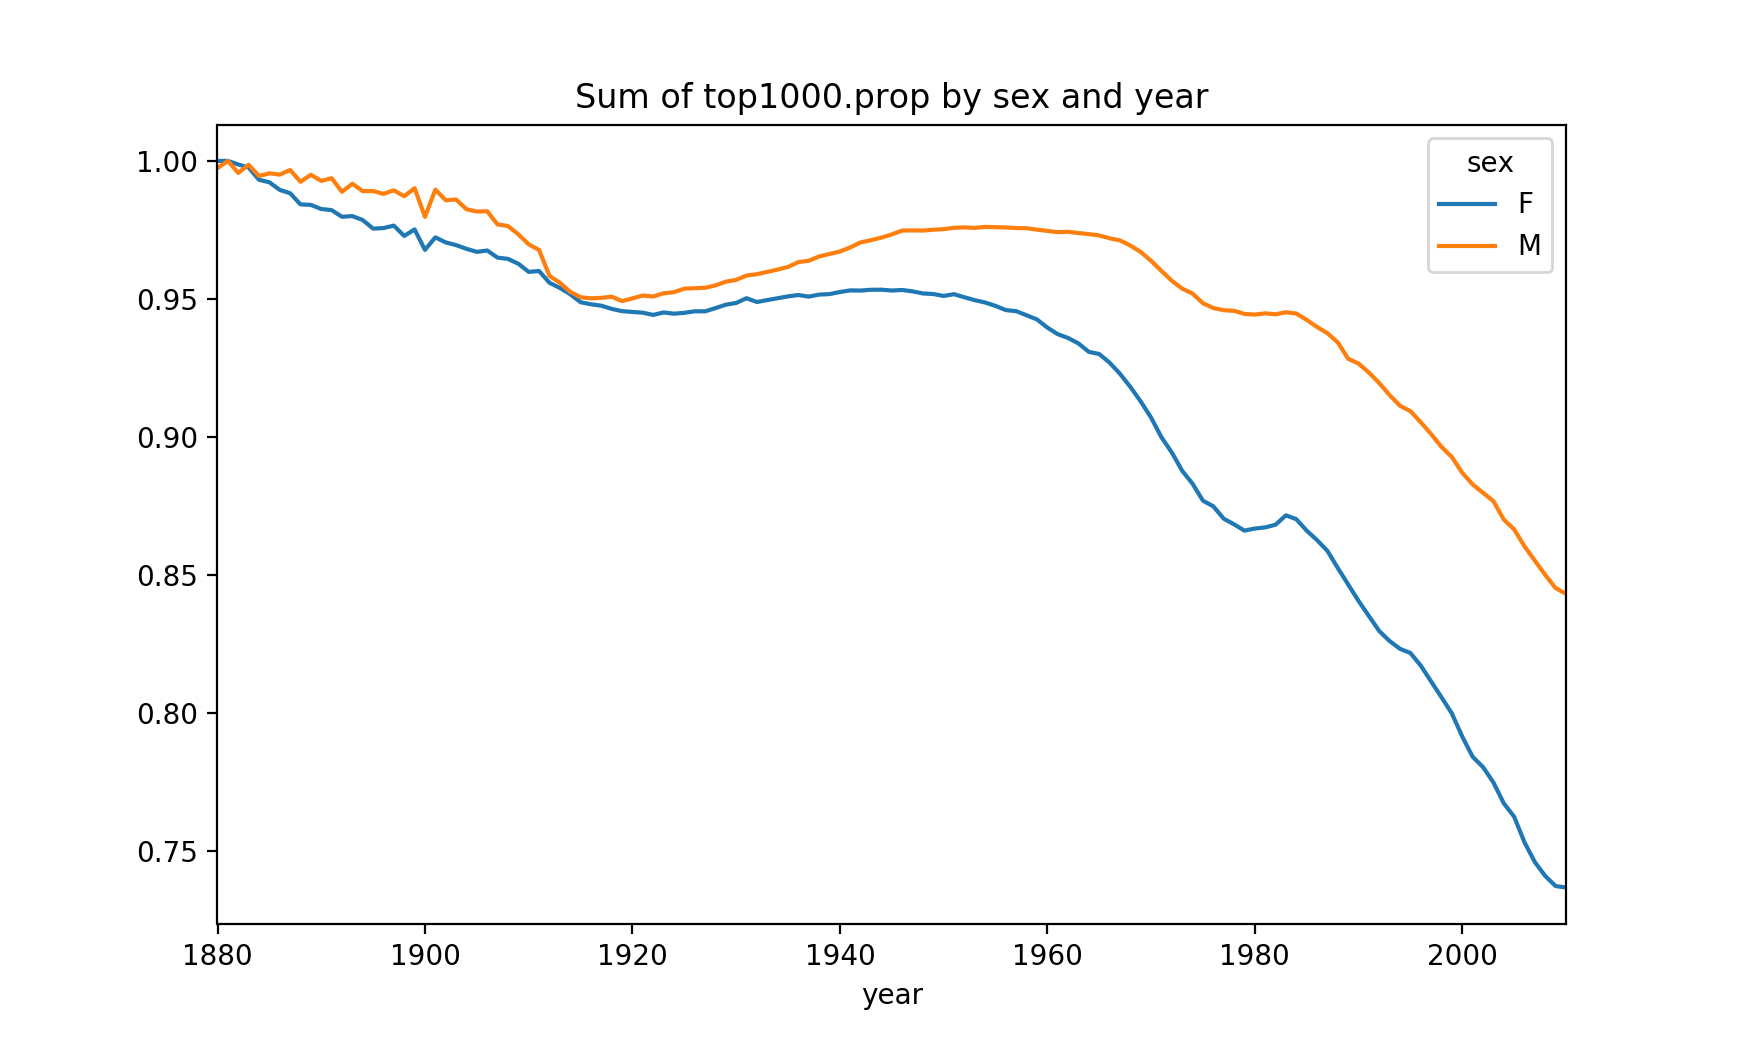

In [69]:
#按性别划分top1000名字的出生比例
table =top1000.pivot_table('prop',index='year',columns='sex',aggfunc='sum')
table.plot(title='Sum of top1000.prop by sex and year')

In [70]:
#top1000的名称占比持续下降，说明名字开始多样性了